### Problem Statement

In the telecommunication industry, customers tend to change operators if not provided with attractive schemes and offers. 
It is very important for any telecom operator to prevent the present customers from churning to other operators. As a data scientist, 
your task in this case study would be to build an ML model which can predict if the customer will churn or not in 
a particular month based on the past data.

In [37]:
import pandas as pd
import numpy as np

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
print("Train Data Shape: ", train_data.shape)
print("Test Data Shape: ", test_data.shape)

Train Data Shape:  (69999, 172)
Test Data Shape:  (30000, 171)


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [5]:
train_data.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [6]:
train_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [7]:
#dropping columns which has no variance and dropping id column.
#'id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
#'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_data_6',
#'date_of_last_rech_data_7', 'date_of_last_rech_data_8'

train_data.drop(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
                 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_data_6',
'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], axis = 1, inplace=True)

test_data.drop(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
                 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_data_6',
'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], axis = 1, inplace=True)

In [9]:
train_data['date_of_last_rech_6'].fillna('06-15-2014', inplace=True)
test_data['date_of_last_rech_6'].fillna('06-15-2014', inplace=True)

train_data['date_of_last_rech_7'].fillna('07-15-2014', inplace=True)
test_data['date_of_last_rech_7'].fillna('07-15-2014', inplace=True)

train_data['date_of_last_rech_8'].fillna('08-15-2014', inplace=True)
test_data['date_of_last_rech_8'].fillna('08-15-2014', inplace=True)

In [10]:
train_data['date_of_last_rech_6'] =  pd.to_datetime(train_data['date_of_last_rech_6']).dt.normalize()
test_data['date_of_last_rech_6'] =  pd.to_datetime(test_data['date_of_last_rech_6']).dt.normalize()

train_data['date_of_last_rech_7'] =  pd.to_datetime(train_data['date_of_last_rech_7']).dt.normalize()
test_data['date_of_last_rech_7'] =  pd.to_datetime(test_data['date_of_last_rech_7']).dt.normalize()

train_data['date_of_last_rech_8'] =  pd.to_datetime(train_data['date_of_last_rech_8']).dt.normalize()
test_data['date_of_last_rech_8'] =  pd.to_datetime(test_data['date_of_last_rech_8']).dt.normalize()


In [17]:
train_data.isnull().sum()

arpu_6                     0
arpu_7                     0
arpu_8                     0
onnet_mou_6             2768
onnet_mou_7             2687
onnet_mou_8             3703
offnet_mou_6            2768
offnet_mou_7            2687
offnet_mou_8            3703
roam_ic_mou_6           2768
roam_ic_mou_7           2687
roam_ic_mou_8           3703
roam_og_mou_6           2768
roam_og_mou_7           2687
roam_og_mou_8           3703
loc_og_t2t_mou_6        2768
loc_og_t2t_mou_7        2687
loc_og_t2t_mou_8        3703
loc_og_t2m_mou_6        2768
loc_og_t2m_mou_7        2687
loc_og_t2m_mou_8        3703
loc_og_t2f_mou_6        2768
loc_og_t2f_mou_7        2687
loc_og_t2f_mou_8        3703
loc_og_t2c_mou_6        2768
loc_og_t2c_mou_7        2687
loc_og_t2c_mou_8        3703
loc_og_mou_6            2768
loc_og_mou_7            2687
loc_og_mou_8            3703
std_og_t2t_mou_6        2768
std_og_t2t_mou_7        2687
std_og_t2t_mou_8        3703
std_og_t2m_mou_6        2768
std_og_t2m_mou

In [18]:
train_data['arpu_3g_6'].value_counts()

 0.00       7617
 212.17      501
 0.01        317
 122.07      295
 63.96       214
 21.91       194
 77.68       127
 35.00       101
 212.18       98
 41.82        85
 0.02         83
 151.11       76
 150.67       73
 424.34       55
-0.04         52
 0.03         44
 67.55        43
 19.63        42
-0.03         31
-0.09         31
 224.00       31
 1.00         30
 389.00       27
 85.01        24
-0.08         24
 122.08       24
 0.06         23
 63.97        21
 0.09         20
 150.68       18
 43.82        18
-0.13         17
 0.04         17
 155.36       16
 0.12         16
 0.18         16
 212.14       15
 424.35       15
-0.23         15
 559.22       14
-0.14         13
 212.13       13
 65.73        12
 10.94        12
 70.00        12
 36.44        11
 442.58       11
 89.78        10
 63.92        10
 0.30         10
-0.02         10
 244.14       10
 13.00        10
 0.75          9
 19.55         9
-0.28          9
 0.42          9
 0.78          9
 2.79         

In [21]:
#impute missing values
train_data['onnet_mou_6'].fillna(value=train_data['onnet_mou_6'].mean(), inplace=True)
train_data['onnet_mou_7'].fillna(value=train_data['onnet_mou_7'].mean(), inplace=True)
train_data['onnet_mou_8'].fillna(value=train_data['onnet_mou_8'].mean(), inplace=True)
train_data['offnet_mou_6'].fillna(value=train_data['offnet_mou_6'].mean(), inplace=True)
train_data['offnet_mou_7'].fillna(value=train_data['offnet_mou_7'].mean(), inplace=True)
train_data['offnet_mou_8'].fillna(value=train_data['offnet_mou_8'].mean(), inplace=True)
train_data['roam_ic_mou_6'].fillna(value=train_data['roam_ic_mou_6'].mean(), inplace=True)
train_data['roam_ic_mou_7'].fillna(value=train_data['roam_ic_mou_7'].mean(), inplace=True)

train_data['roam_ic_mou_8'].fillna(value=train_data['roam_ic_mou_8'].mean(), inplace=True)
train_data['roam_og_mou_6'].fillna(value=train_data['roam_og_mou_6'].mean(), inplace=True)
train_data['roam_og_mou_7'].fillna(value=train_data['roam_og_mou_7'].mean(), inplace=True)
train_data['roam_og_mou_8'].fillna(value=train_data['roam_og_mou_8'].mean(), inplace=True)
train_data['loc_og_t2t_mou_6'].fillna(value=train_data['loc_og_t2t_mou_6'].mean(), inplace=True)
train_data['loc_og_t2t_mou_7'].fillna(value=train_data['loc_og_t2t_mou_7'].mean(), inplace=True)
train_data['loc_og_t2t_mou_8'].fillna(value=train_data['loc_og_t2t_mou_8'].mean(), inplace=True)
train_data['loc_og_t2m_mou_6'].fillna(value=train_data['loc_og_t2m_mou_6'].mean(), inplace=True)
train_data['loc_og_t2m_mou_7'].fillna(value=train_data['loc_og_t2m_mou_7'].mean(), inplace=True)
train_data['loc_og_t2m_mou_8'].fillna(value=train_data['loc_og_t2m_mou_8'].mean(), inplace=True)

train_data['loc_og_t2f_mou_6'].fillna(value=train_data['loc_og_t2f_mou_6'].mean(), inplace=True)
train_data['loc_og_t2f_mou_7'].fillna(value=train_data['loc_og_t2f_mou_7'].mean(), inplace=True)
train_data['loc_og_t2f_mou_8'].fillna(value=train_data['loc_og_t2f_mou_8'].mean(), inplace=True)
train_data['loc_og_t2c_mou_6'].fillna(value=train_data['loc_og_t2c_mou_6'].mean(), inplace=True)
train_data['loc_og_t2c_mou_7'].fillna(value=train_data['loc_og_t2c_mou_7'].mean(), inplace=True)
train_data['loc_og_t2c_mou_8'].fillna(value=train_data['loc_og_t2c_mou_8'].mean(), inplace=True)
train_data['loc_og_mou_6'].fillna(value=train_data['loc_og_mou_6'].mean(), inplace=True)
train_data['loc_og_mou_7'].fillna(value=train_data['loc_og_mou_7'].mean(), inplace=True)
train_data['loc_og_mou_8'].fillna(value=train_data['loc_og_mou_8'].mean(), inplace=True)
train_data['std_og_t2t_mou_6'].fillna(value=train_data['std_og_t2t_mou_6'].mean(), inplace=True)
train_data['std_og_t2t_mou_7'].fillna(value=train_data['std_og_t2t_mou_7'].mean(), inplace=True)
train_data['std_og_t2t_mou_8'].fillna(value=train_data['std_og_t2t_mou_8'].mean(), inplace=True)
train_data['std_og_t2m_mou_6'].fillna(value=train_data['std_og_t2m_mou_6'].mean(), inplace=True)
train_data['std_og_t2m_mou_7'].fillna(value=train_data['std_og_t2m_mou_7'].mean(), inplace=True)

train_data['std_og_t2m_mou_8'].fillna(value=train_data['std_og_t2m_mou_8'].mean(), inplace=True)
train_data['std_og_t2f_mou_6'].fillna(value=train_data['std_og_t2f_mou_6'].mean(), inplace=True)
train_data['std_og_t2f_mou_7'].fillna(value=train_data['std_og_t2f_mou_7'].mean(), inplace=True)
train_data['std_og_t2f_mou_8'].fillna(value=train_data['std_og_t2f_mou_8'].mean(), inplace=True)
train_data['std_og_t2c_mou_6'].fillna(value=train_data['std_og_t2c_mou_6'].mean(), inplace=True)
train_data['std_og_t2c_mou_7'].fillna(value=train_data['std_og_t2c_mou_7'].mean(), inplace=True)
train_data['std_og_t2c_mou_8'].fillna(value=train_data['std_og_t2c_mou_8'].mean(), inplace=True)
train_data['std_og_mou_6'].fillna(value=train_data['std_og_mou_6'].mean(), inplace=True)
train_data['std_og_mou_7'].fillna(value=train_data['std_og_mou_7'].mean(), inplace=True)
train_data['std_og_mou_8'].fillna(value=train_data['std_og_mou_8'].mean(), inplace=True)
train_data['isd_og_mou_6'].fillna(value=train_data['isd_og_mou_6'].mean(), inplace=True)
train_data['isd_og_mou_7'].fillna(value=train_data['isd_og_mou_7'].mean(), inplace=True)
train_data['isd_og_mou_8'].fillna(value=train_data['isd_og_mou_8'].mean(), inplace=True)
train_data['spl_og_mou_6'].fillna(value=train_data['spl_og_mou_6'].mean(), inplace=True)
train_data['spl_og_mou_7'].fillna(value=train_data['spl_og_mou_7'].mean(), inplace=True)
train_data['spl_og_mou_8'].fillna(value=train_data['spl_og_mou_8'].mean(), inplace=True)

train_data['og_others_6'].fillna(value=train_data['og_others_6'].mean(), inplace=True)
train_data['og_others_7'].fillna(value=train_data['og_others_7'].mean(), inplace=True)
train_data['og_others_8'].fillna(value=train_data['og_others_8'].mean(), inplace=True)
train_data['loc_ic_t2t_mou_6'].fillna(value=train_data['loc_ic_t2t_mou_6'].mean(), inplace=True)
train_data['loc_ic_t2t_mou_7'].fillna(value=train_data['loc_ic_t2t_mou_7'].mean(), inplace=True)
train_data['loc_ic_t2t_mou_8'].fillna(value=train_data['loc_ic_t2t_mou_8'].mean(), inplace=True)

train_data['loc_ic_t2m_mou_6'].fillna(value=train_data['loc_ic_t2m_mou_6'].mean(), inplace=True)
train_data['loc_ic_t2m_mou_7'].fillna(value=train_data['loc_ic_t2m_mou_7'].mean(), inplace=True)
train_data['loc_ic_t2m_mou_8'].fillna(value=train_data['loc_ic_t2m_mou_8'].mean(), inplace=True)

train_data['loc_ic_t2f_mou_6'].fillna(value=train_data['loc_ic_t2f_mou_6'].mean(), inplace=True)
train_data['loc_ic_t2f_mou_7'].fillna(value=train_data['loc_ic_t2f_mou_7'].mean(), inplace=True)
train_data['loc_ic_t2f_mou_8'].fillna(value=train_data['loc_ic_t2f_mou_8'].mean(), inplace=True)
train_data['loc_ic_mou_6'].fillna(value=train_data['loc_ic_mou_6'].mean(), inplace=True)
train_data['loc_ic_mou_7'].fillna(value=train_data['loc_ic_mou_7'].mean(), inplace=True)
train_data['loc_ic_mou_8'].fillna(value=train_data['loc_ic_mou_8'].mean(), inplace=True)
train_data['std_ic_t2t_mou_6'].fillna(value=train_data['std_ic_t2t_mou_6'].mean(), inplace=True)
train_data['std_ic_t2t_mou_7'].fillna(value=train_data['std_ic_t2t_mou_7'].mean(), inplace=True)
train_data['std_ic_t2t_mou_8'].fillna(value=train_data['std_ic_t2t_mou_8'].mean(), inplace=True)
train_data['std_ic_t2m_mou_6'].fillna(value=train_data['std_ic_t2m_mou_6'].mean(), inplace=True)
train_data['std_ic_t2m_mou_7'].fillna(value=train_data['std_ic_t2m_mou_7'].mean(), inplace=True)
train_data['std_ic_t2m_mou_8'].fillna(value=train_data['std_ic_t2m_mou_8'].mean(), inplace=True)
train_data['std_ic_t2f_mou_6'].fillna(value=train_data['std_ic_t2f_mou_6'].mean(), inplace=True)
train_data['std_ic_t2f_mou_7'].fillna(value=train_data['std_ic_t2f_mou_7'].mean(), inplace=True)
train_data['std_ic_t2f_mou_8'].fillna(value=train_data['std_ic_t2f_mou_8'].mean(), inplace=True)
train_data['std_ic_t2o_mou_6'].fillna(value=train_data['std_ic_t2o_mou_6'].mean(), inplace=True)
train_data['std_ic_t2o_mou_7'].fillna(value=train_data['std_ic_t2o_mou_7'].mean(), inplace=True)
train_data['std_ic_t2o_mou_8'].fillna(value=train_data['std_ic_t2o_mou_8'].mean(), inplace=True)
train_data['std_ic_mou_6'].fillna(value=train_data['std_ic_mou_6'].mean(), inplace=True)
train_data['std_ic_mou_7'].fillna(value=train_data['std_ic_mou_7'].mean(), inplace=True)
train_data['std_ic_mou_8'].fillna(value=train_data['std_ic_mou_8'].mean(), inplace=True)
train_data['spl_ic_mou_6'].fillna(value=train_data['spl_ic_mou_6'].mean(), inplace=True)
train_data['spl_ic_mou_7'].fillna(value=train_data['spl_ic_mou_7'].mean(), inplace=True)
train_data['spl_ic_mou_8'].fillna(value=train_data['spl_ic_mou_8'].mean(), inplace=True)
train_data['isd_ic_mou_6'].fillna(value=train_data['isd_ic_mou_6'].mean(), inplace=True)
train_data['isd_ic_mou_7'].fillna(value=train_data['isd_ic_mou_7'].mean(), inplace=True)
train_data['isd_ic_mou_8'].fillna(value=train_data['isd_ic_mou_8'].mean(), inplace=True)
train_data['ic_others_6'].fillna(value=train_data['ic_others_6'].mean(), inplace=True)
train_data['ic_others_7'].fillna(value=train_data['ic_others_7'].mean(), inplace=True)
train_data['ic_others_8'].fillna(value=train_data['ic_others_8'].mean(), inplace=True)


train_data['total_rech_data_6'].fillna(0, inplace=True)
train_data['total_rech_data_7'].fillna(0, inplace=True)
train_data['total_rech_data_8'].fillna(0, inplace=True)
train_data['max_rech_data_6'].fillna(0, inplace=True)
train_data['max_rech_data_7'].fillna(0, inplace=True)
train_data['max_rech_data_8'].fillna(0, inplace=True)

train_data['count_rech_2g_6'].fillna(0, inplace=True)
train_data['count_rech_2g_7'].fillna(0, inplace=True)
train_data['count_rech_2g_8'].fillna(0, inplace=True)

train_data['count_rech_3g_6'].fillna(0, inplace=True)
train_data['count_rech_3g_7'].fillna(0, inplace=True)
train_data['count_rech_3g_8'].fillna(0, inplace=True)

train_data['av_rech_amt_data_6'].fillna(0, inplace=True)
train_data['av_rech_amt_data_7'].fillna(0, inplace=True)
train_data['av_rech_amt_data_8'].fillna(0, inplace=True)

train_data['arpu_3g_6'].fillna(0, inplace=True)
train_data['arpu_3g_7'].fillna(0, inplace=True)
train_data['arpu_3g_8'].fillna(0, inplace=True)

train_data['arpu_2g_6'].fillna(0, inplace=True)
train_data['arpu_2g_7'].fillna(0, inplace=True)
train_data['arpu_2g_8'].fillna(0, inplace=True)

train_data['night_pck_user_6'].fillna(0, inplace=True)
train_data['night_pck_user_7'].fillna(0, inplace=True)
train_data['night_pck_user_8'].fillna(0, inplace=True)

train_data['fb_user_6'].fillna(0, inplace=True)
train_data['fb_user_7'].fillna(0, inplace=True)
train_data['fb_user_8'].fillna(0, inplace=True)

In [22]:
#impute missing values
test_data['onnet_mou_6'].fillna(value=test_data['onnet_mou_6'].mean(), inplace=True)
test_data['onnet_mou_7'].fillna(value=test_data['onnet_mou_7'].mean(), inplace=True)
test_data['onnet_mou_8'].fillna(value=test_data['onnet_mou_8'].mean(), inplace=True)
test_data['offnet_mou_6'].fillna(value=test_data['offnet_mou_6'].mean(), inplace=True)
test_data['offnet_mou_7'].fillna(value=test_data['offnet_mou_7'].mean(), inplace=True)
test_data['offnet_mou_8'].fillna(value=test_data['offnet_mou_8'].mean(), inplace=True)
test_data['roam_ic_mou_6'].fillna(value=test_data['roam_ic_mou_6'].mean(), inplace=True)
test_data['roam_ic_mou_7'].fillna(value=test_data['roam_ic_mou_7'].mean(), inplace=True)

test_data['roam_ic_mou_8'].fillna(value=test_data['roam_ic_mou_8'].mean(), inplace=True)
test_data['roam_og_mou_6'].fillna(value=test_data['roam_og_mou_6'].mean(), inplace=True)
test_data['roam_og_mou_7'].fillna(value=test_data['roam_og_mou_7'].mean(), inplace=True)
test_data['roam_og_mou_8'].fillna(value=test_data['roam_og_mou_8'].mean(), inplace=True)
test_data['loc_og_t2t_mou_6'].fillna(value=test_data['loc_og_t2t_mou_6'].mean(), inplace=True)
test_data['loc_og_t2t_mou_7'].fillna(value=test_data['loc_og_t2t_mou_7'].mean(), inplace=True)
test_data['loc_og_t2t_mou_8'].fillna(value=test_data['loc_og_t2t_mou_8'].mean(), inplace=True)
test_data['loc_og_t2m_mou_6'].fillna(value=test_data['loc_og_t2m_mou_6'].mean(), inplace=True)
test_data['loc_og_t2m_mou_7'].fillna(value=test_data['loc_og_t2m_mou_7'].mean(), inplace=True)
test_data['loc_og_t2m_mou_8'].fillna(value=test_data['loc_og_t2m_mou_8'].mean(), inplace=True)

test_data['loc_og_t2f_mou_6'].fillna(value=test_data['loc_og_t2f_mou_6'].mean(), inplace=True)
test_data['loc_og_t2f_mou_7'].fillna(value=test_data['loc_og_t2f_mou_7'].mean(), inplace=True)
test_data['loc_og_t2f_mou_8'].fillna(value=test_data['loc_og_t2f_mou_8'].mean(), inplace=True)
test_data['loc_og_t2c_mou_6'].fillna(value=test_data['loc_og_t2c_mou_6'].mean(), inplace=True)
test_data['loc_og_t2c_mou_7'].fillna(value=test_data['loc_og_t2c_mou_7'].mean(), inplace=True)
test_data['loc_og_t2c_mou_8'].fillna(value=test_data['loc_og_t2c_mou_8'].mean(), inplace=True)
test_data['loc_og_mou_6'].fillna(value=test_data['loc_og_mou_6'].mean(), inplace=True)
test_data['loc_og_mou_7'].fillna(value=test_data['loc_og_mou_7'].mean(), inplace=True)
test_data['loc_og_mou_8'].fillna(value=test_data['loc_og_mou_8'].mean(), inplace=True)
test_data['std_og_t2t_mou_6'].fillna(value=test_data['std_og_t2t_mou_6'].mean(), inplace=True)
test_data['std_og_t2t_mou_7'].fillna(value=test_data['std_og_t2t_mou_7'].mean(), inplace=True)
test_data['std_og_t2t_mou_8'].fillna(value=test_data['std_og_t2t_mou_8'].mean(), inplace=True)
test_data['std_og_t2m_mou_6'].fillna(value=test_data['std_og_t2m_mou_6'].mean(), inplace=True)
test_data['std_og_t2m_mou_7'].fillna(value=test_data['std_og_t2m_mou_7'].mean(), inplace=True)

test_data['std_og_t2m_mou_8'].fillna(value=test_data['std_og_t2m_mou_8'].mean(), inplace=True)
test_data['std_og_t2f_mou_6'].fillna(value=test_data['std_og_t2f_mou_6'].mean(), inplace=True)
test_data['std_og_t2f_mou_7'].fillna(value=test_data['std_og_t2f_mou_7'].mean(), inplace=True)
test_data['std_og_t2f_mou_8'].fillna(value=test_data['std_og_t2f_mou_8'].mean(), inplace=True)
test_data['std_og_t2c_mou_6'].fillna(value=test_data['std_og_t2c_mou_6'].mean(), inplace=True)
test_data['std_og_t2c_mou_7'].fillna(value=test_data['std_og_t2c_mou_7'].mean(), inplace=True)
test_data['std_og_t2c_mou_8'].fillna(value=test_data['std_og_t2c_mou_8'].mean(), inplace=True)
test_data['std_og_mou_6'].fillna(value=test_data['std_og_mou_6'].mean(), inplace=True)
test_data['std_og_mou_7'].fillna(value=test_data['std_og_mou_7'].mean(), inplace=True)
test_data['std_og_mou_8'].fillna(value=test_data['std_og_mou_8'].mean(), inplace=True)
test_data['isd_og_mou_6'].fillna(value=test_data['isd_og_mou_6'].mean(), inplace=True)
test_data['isd_og_mou_7'].fillna(value=test_data['isd_og_mou_7'].mean(), inplace=True)
test_data['isd_og_mou_8'].fillna(value=test_data['isd_og_mou_8'].mean(), inplace=True)
test_data['spl_og_mou_6'].fillna(value=test_data['spl_og_mou_6'].mean(), inplace=True)
test_data['spl_og_mou_7'].fillna(value=test_data['spl_og_mou_7'].mean(), inplace=True)
test_data['spl_og_mou_8'].fillna(value=test_data['spl_og_mou_8'].mean(), inplace=True)

test_data['og_others_6'].fillna(value=test_data['og_others_6'].mean(), inplace=True)
test_data['og_others_7'].fillna(value=test_data['og_others_7'].mean(), inplace=True)
test_data['og_others_8'].fillna(value=test_data['og_others_8'].mean(), inplace=True)
test_data['loc_ic_t2t_mou_6'].fillna(value=test_data['loc_ic_t2t_mou_6'].mean(), inplace=True)
test_data['loc_ic_t2t_mou_7'].fillna(value=test_data['loc_ic_t2t_mou_7'].mean(), inplace=True)
test_data['loc_ic_t2t_mou_8'].fillna(value=test_data['loc_ic_t2t_mou_8'].mean(), inplace=True)

test_data['loc_ic_t2m_mou_6'].fillna(value=test_data['loc_ic_t2m_mou_6'].mean(), inplace=True)
test_data['loc_ic_t2m_mou_7'].fillna(value=test_data['loc_ic_t2m_mou_7'].mean(), inplace=True)
test_data['loc_ic_t2m_mou_8'].fillna(value=test_data['loc_ic_t2m_mou_8'].mean(), inplace=True)

test_data['loc_ic_t2f_mou_6'].fillna(value=test_data['loc_ic_t2f_mou_6'].mean(), inplace=True)
test_data['loc_ic_t2f_mou_7'].fillna(value=test_data['loc_ic_t2f_mou_7'].mean(), inplace=True)
test_data['loc_ic_t2f_mou_8'].fillna(value=test_data['loc_ic_t2f_mou_8'].mean(), inplace=True)
test_data['loc_ic_mou_6'].fillna(value=test_data['loc_ic_mou_6'].mean(), inplace=True)
test_data['loc_ic_mou_7'].fillna(value=test_data['loc_ic_mou_7'].mean(), inplace=True)
test_data['loc_ic_mou_8'].fillna(value=test_data['loc_ic_mou_8'].mean(), inplace=True)
test_data['std_ic_t2t_mou_6'].fillna(value=test_data['std_ic_t2t_mou_6'].mean(), inplace=True)
test_data['std_ic_t2t_mou_7'].fillna(value=test_data['std_ic_t2t_mou_7'].mean(), inplace=True)
test_data['std_ic_t2t_mou_8'].fillna(value=test_data['std_ic_t2t_mou_8'].mean(), inplace=True)
test_data['std_ic_t2m_mou_6'].fillna(value=test_data['std_ic_t2m_mou_6'].mean(), inplace=True)
test_data['std_ic_t2m_mou_7'].fillna(value=test_data['std_ic_t2m_mou_7'].mean(), inplace=True)
test_data['std_ic_t2m_mou_8'].fillna(value=test_data['std_ic_t2m_mou_8'].mean(), inplace=True)
test_data['std_ic_t2f_mou_6'].fillna(value=test_data['std_ic_t2f_mou_6'].mean(), inplace=True)
test_data['std_ic_t2f_mou_7'].fillna(value=test_data['std_ic_t2f_mou_7'].mean(), inplace=True)
test_data['std_ic_t2f_mou_8'].fillna(value=test_data['std_ic_t2f_mou_8'].mean(), inplace=True)
test_data['std_ic_t2o_mou_6'].fillna(value=test_data['std_ic_t2o_mou_6'].mean(), inplace=True)
test_data['std_ic_t2o_mou_7'].fillna(value=test_data['std_ic_t2o_mou_7'].mean(), inplace=True)
test_data['std_ic_t2o_mou_8'].fillna(value=test_data['std_ic_t2o_mou_8'].mean(), inplace=True)
test_data['std_ic_mou_6'].fillna(value=test_data['std_ic_mou_6'].mean(), inplace=True)
test_data['std_ic_mou_7'].fillna(value=test_data['std_ic_mou_7'].mean(), inplace=True)
test_data['std_ic_mou_8'].fillna(value=test_data['std_ic_mou_8'].mean(), inplace=True)
test_data['spl_ic_mou_6'].fillna(value=test_data['spl_ic_mou_6'].mean(), inplace=True)
test_data['spl_ic_mou_7'].fillna(value=test_data['spl_ic_mou_7'].mean(), inplace=True)
test_data['spl_ic_mou_8'].fillna(value=test_data['spl_ic_mou_8'].mean(), inplace=True)
test_data['isd_ic_mou_6'].fillna(value=test_data['isd_ic_mou_6'].mean(), inplace=True)
test_data['isd_ic_mou_7'].fillna(value=test_data['isd_ic_mou_7'].mean(), inplace=True)
test_data['isd_ic_mou_8'].fillna(value=test_data['isd_ic_mou_8'].mean(), inplace=True)
test_data['ic_others_6'].fillna(value=test_data['ic_others_6'].mean(), inplace=True)
test_data['ic_others_7'].fillna(value=test_data['ic_others_7'].mean(), inplace=True)
test_data['ic_others_8'].fillna(value=test_data['ic_others_8'].mean(), inplace=True)


test_data['total_rech_data_6'].fillna(0, inplace=True)
test_data['total_rech_data_7'].fillna(0, inplace=True)
test_data['total_rech_data_8'].fillna(0, inplace=True)
test_data['max_rech_data_6'].fillna(0, inplace=True)
test_data['max_rech_data_7'].fillna(0, inplace=True)
test_data['max_rech_data_8'].fillna(0, inplace=True)

test_data['count_rech_2g_6'].fillna(0, inplace=True)
test_data['count_rech_2g_7'].fillna(0, inplace=True)
test_data['count_rech_2g_8'].fillna(0, inplace=True)

test_data['count_rech_3g_6'].fillna(0, inplace=True)
test_data['count_rech_3g_7'].fillna(0, inplace=True)
test_data['count_rech_3g_8'].fillna(0, inplace=True)

test_data['av_rech_amt_data_6'].fillna(0, inplace=True)
test_data['av_rech_amt_data_7'].fillna(0, inplace=True)
test_data['av_rech_amt_data_8'].fillna(0, inplace=True)

test_data['arpu_3g_6'].fillna(0, inplace=True)
test_data['arpu_3g_7'].fillna(0, inplace=True)
test_data['arpu_3g_8'].fillna(0, inplace=True)

test_data['arpu_2g_6'].fillna(0, inplace=True)
test_data['arpu_2g_7'].fillna(0, inplace=True)
test_data['arpu_2g_8'].fillna(0, inplace=True)

test_data['night_pck_user_6'].fillna(0, inplace=True)
test_data['night_pck_user_7'].fillna(0, inplace=True)
test_data['night_pck_user_8'].fillna(0, inplace=True)

test_data['fb_user_6'].fillna(0, inplace=True)
test_data['fb_user_7'].fillna(0, inplace=True)
test_data['fb_user_8'].fillna(0, inplace=True)

In [23]:
train_data.isnull().sum()

arpu_6                 0
arpu_7                 0
arpu_8                 0
onnet_mou_6            0
onnet_mou_7            0
onnet_mou_8            0
offnet_mou_6           0
offnet_mou_7           0
offnet_mou_8           0
roam_ic_mou_6          0
roam_ic_mou_7          0
roam_ic_mou_8          0
roam_og_mou_6          0
roam_og_mou_7          0
roam_og_mou_8          0
loc_og_t2t_mou_6       0
loc_og_t2t_mou_7       0
loc_og_t2t_mou_8       0
loc_og_t2m_mou_6       0
loc_og_t2m_mou_7       0
loc_og_t2m_mou_8       0
loc_og_t2f_mou_6       0
loc_og_t2f_mou_7       0
loc_og_t2f_mou_8       0
loc_og_t2c_mou_6       0
loc_og_t2c_mou_7       0
loc_og_t2c_mou_8       0
loc_og_mou_6           0
loc_og_mou_7           0
loc_og_mou_8           0
std_og_t2t_mou_6       0
std_og_t2t_mou_7       0
std_og_t2t_mou_8       0
std_og_t2m_mou_6       0
std_og_t2m_mou_7       0
std_og_t2m_mou_8       0
std_og_t2f_mou_6       0
std_og_t2f_mou_7       0
std_og_t2f_mou_8       0
std_og_t2c_mou_6       0


In [24]:
test_data.isnull().sum()

arpu_6                 0
arpu_7                 0
arpu_8                 0
onnet_mou_6            0
onnet_mou_7            0
onnet_mou_8            0
offnet_mou_6           0
offnet_mou_7           0
offnet_mou_8           0
roam_ic_mou_6          0
roam_ic_mou_7          0
roam_ic_mou_8          0
roam_og_mou_6          0
roam_og_mou_7          0
roam_og_mou_8          0
loc_og_t2t_mou_6       0
loc_og_t2t_mou_7       0
loc_og_t2t_mou_8       0
loc_og_t2m_mou_6       0
loc_og_t2m_mou_7       0
loc_og_t2m_mou_8       0
loc_og_t2f_mou_6       0
loc_og_t2f_mou_7       0
loc_og_t2f_mou_8       0
loc_og_t2c_mou_6       0
loc_og_t2c_mou_7       0
loc_og_t2c_mou_8       0
loc_og_mou_6           0
loc_og_mou_7           0
loc_og_mou_8           0
std_og_t2t_mou_6       0
std_og_t2t_mou_7       0
std_og_t2t_mou_8       0
std_og_t2m_mou_6       0
std_og_t2m_mou_7       0
std_og_t2m_mou_8       0
std_og_t2f_mou_6       0
std_og_t2f_mou_7       0
std_og_t2f_mou_8       0
std_og_t2c_mou_6       0


In [25]:
y_train = train_data.pop('churn_probability')

In [32]:
X_train = train_data

In [33]:
X_train.shape

(69999, 160)

In [34]:
y_train.shape

(69999,)

In [35]:
test_data.isnull().sum()

arpu_6                 0
arpu_7                 0
arpu_8                 0
onnet_mou_6            0
onnet_mou_7            0
onnet_mou_8            0
offnet_mou_6           0
offnet_mou_7           0
offnet_mou_8           0
roam_ic_mou_6          0
roam_ic_mou_7          0
roam_ic_mou_8          0
roam_og_mou_6          0
roam_og_mou_7          0
roam_og_mou_8          0
loc_og_t2t_mou_6       0
loc_og_t2t_mou_7       0
loc_og_t2t_mou_8       0
loc_og_t2m_mou_6       0
loc_og_t2m_mou_7       0
loc_og_t2m_mou_8       0
loc_og_t2f_mou_6       0
loc_og_t2f_mou_7       0
loc_og_t2f_mou_8       0
loc_og_t2c_mou_6       0
loc_og_t2c_mou_7       0
loc_og_t2c_mou_8       0
loc_og_mou_6           0
loc_og_mou_7           0
loc_og_mou_8           0
std_og_t2t_mou_6       0
std_og_t2t_mou_7       0
std_og_t2t_mou_8       0
std_og_t2m_mou_6       0
std_og_t2m_mou_7       0
std_og_t2m_mou_8       0
std_og_t2f_mou_6       0
std_og_t2f_mou_7       0
std_og_t2f_mou_8       0
std_og_t2c_mou_6       0


<AxesSubplot:>

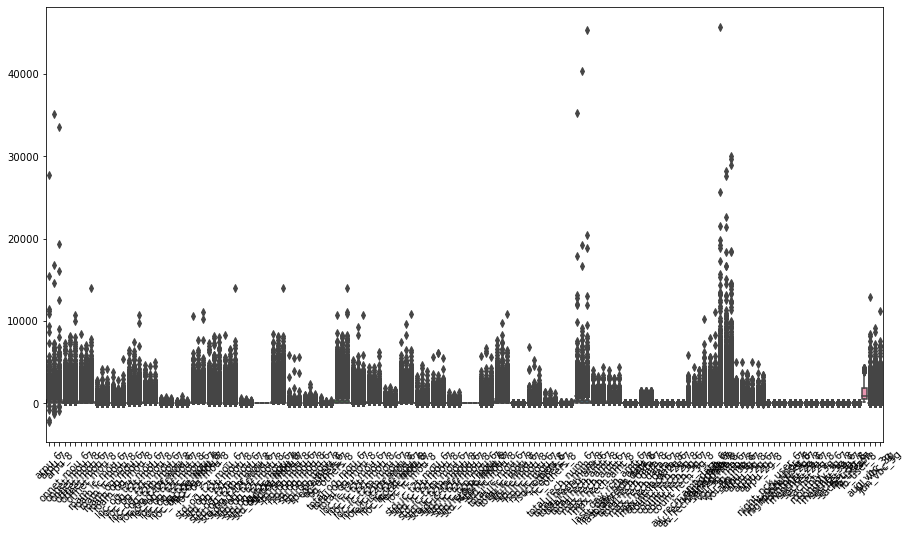

In [38]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X_train)

### taking care of outliers

In [39]:
X_train.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 160 columns):
 #    Column               Dtype         
---   ------               -----         
 0    arpu_6               float64       
 1    arpu_7               float64       
 2    arpu_8               float64       
 3    onnet_mou_6          float64       
 4    onnet_mou_7          float64       
 5    onnet_mou_8          float64       
 6    offnet_mou_6         float64       
 7    offnet_mou_7         float64       
 8    offnet_mou_8         float64       
 9    roam_ic_mou_6        float64       
 10   roam_ic_mou_7        float64       
 11   roam_ic_mou_8        float64       
 12   roam_og_mou_6        float64       
 13   roam_og_mou_7        float64       
 14   roam_og_mou_8        float64       
 15   loc_og_t2t_mou_6     float64       
 16   loc_og_t2t_mou_7     float64       
 17   loc_og_t2t_mou_8     float64       
 18   loc_og_t2m_mou_6     float64       
 19   lo

In [42]:
def remove_outliers_data(dataframe):
    for col in dataframe.columns:
        print("fixing outliers for ",col)
        if (((dataframe[col].dtype)=='float64') | ((dataframe[col].dtype)=='int64')):
            percentiles = dataframe[col].quantile([0.01,0.99]).values
            dataframe[col][dataframe[col] <= percentiles[0]] = percentiles[0]
            dataframe[col][dataframe[col] >= percentiles[1]] = percentiles[1]
        else:
            dataframe[col]=dataframe[col]
    return dataframe

X_train_final = remove_outliers_data(X_train)

fixing outliers for  arpu_6
fixing outliers for  arpu_7
fixing outliers for  arpu_8
fixing outliers for  onnet_mou_6
fixing outliers for  onnet_mou_7
fixing outliers for  onnet_mou_8
fixing outliers for  offnet_mou_6
fixing outliers for  offnet_mou_7
fixing outliers for  offnet_mou_8
fixing outliers for  roam_ic_mou_6
fixing outliers for  roam_ic_mou_7
fixing outliers for  roam_ic_mou_8
fixing outliers for  roam_og_mou_6
fixing outliers for  roam_og_mou_7
fixing outliers for  roam_og_mou_8
fixing outliers for  loc_og_t2t_mou_6
fixing outliers for  loc_og_t2t_mou_7
fixing outliers for  loc_og_t2t_mou_8
fixing outliers for  loc_og_t2m_mou_6
fixing outliers for  loc_og_t2m_mou_7
fixing outliers for  loc_og_t2m_mou_8
fixing outliers for  loc_og_t2f_mou_6
fixing outliers for  loc_og_t2f_mou_7
fixing outliers for  loc_og_t2f_mou_8
fixing outliers for  loc_og_t2c_mou_6
fixing outliers for  loc_og_t2c_mou_7
fixing outliers for  loc_og_t2c_mou_8
fixing outliers for  loc_og_mou_6
fixing outliers

<AxesSubplot:>

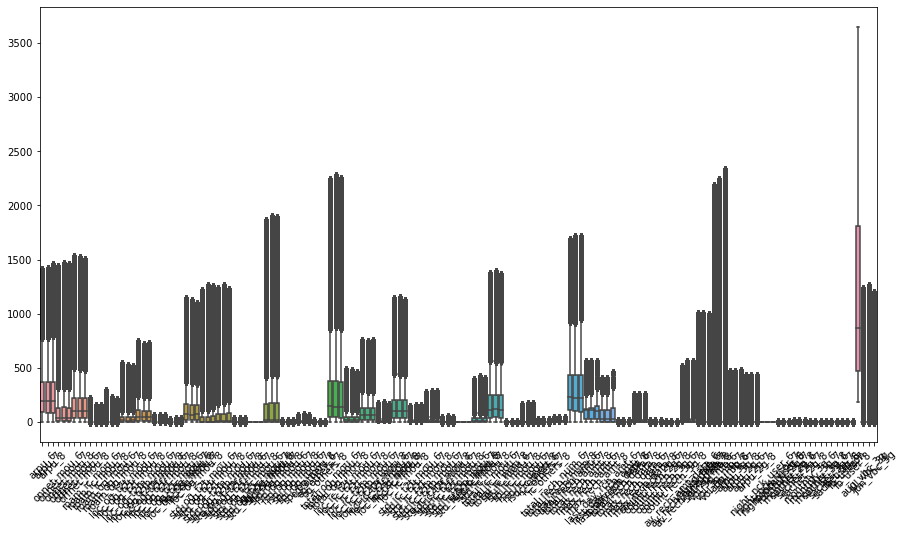

In [41]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X_train_final)

In [43]:
test_data.shape

(30000, 160)

In [44]:
test_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 160 columns):
 #    Column               Dtype         
---   ------               -----         
 0    arpu_6               float64       
 1    arpu_7               float64       
 2    arpu_8               float64       
 3    onnet_mou_6          float64       
 4    onnet_mou_7          float64       
 5    onnet_mou_8          float64       
 6    offnet_mou_6         float64       
 7    offnet_mou_7         float64       
 8    offnet_mou_8         float64       
 9    roam_ic_mou_6        float64       
 10   roam_ic_mou_7        float64       
 11   roam_ic_mou_8        float64       
 12   roam_og_mou_6        float64       
 13   roam_og_mou_7        float64       
 14   roam_og_mou_8        float64       
 15   loc_og_t2t_mou_6     float64       
 16   loc_og_t2t_mou_7     float64       
 17   loc_og_t2t_mou_8     float64       
 18   loc_og_t2m_mou_6     float64       
 19   lo

In [45]:
test_data.isnull().sum()

arpu_6                 0
arpu_7                 0
arpu_8                 0
onnet_mou_6            0
onnet_mou_7            0
onnet_mou_8            0
offnet_mou_6           0
offnet_mou_7           0
offnet_mou_8           0
roam_ic_mou_6          0
roam_ic_mou_7          0
roam_ic_mou_8          0
roam_og_mou_6          0
roam_og_mou_7          0
roam_og_mou_8          0
loc_og_t2t_mou_6       0
loc_og_t2t_mou_7       0
loc_og_t2t_mou_8       0
loc_og_t2m_mou_6       0
loc_og_t2m_mou_7       0
loc_og_t2m_mou_8       0
loc_og_t2f_mou_6       0
loc_og_t2f_mou_7       0
loc_og_t2f_mou_8       0
loc_og_t2c_mou_6       0
loc_og_t2c_mou_7       0
loc_og_t2c_mou_8       0
loc_og_mou_6           0
loc_og_mou_7           0
loc_og_mou_8           0
std_og_t2t_mou_6       0
std_og_t2t_mou_7       0
std_og_t2t_mou_8       0
std_og_t2m_mou_6       0
std_og_t2m_mou_7       0
std_og_t2m_mou_8       0
std_og_t2f_mou_6       0
std_og_t2f_mou_7       0
std_og_t2f_mou_8       0
std_og_t2c_mou_6       0


In [46]:
#fixing outliers in test data
X_test = test_data
X_test_final = remove_outliers_data(X_test)

fixing outliers for  arpu_6
fixing outliers for  arpu_7
fixing outliers for  arpu_8
fixing outliers for  onnet_mou_6
fixing outliers for  onnet_mou_7
fixing outliers for  onnet_mou_8
fixing outliers for  offnet_mou_6
fixing outliers for  offnet_mou_7
fixing outliers for  offnet_mou_8
fixing outliers for  roam_ic_mou_6
fixing outliers for  roam_ic_mou_7
fixing outliers for  roam_ic_mou_8
fixing outliers for  roam_og_mou_6
fixing outliers for  roam_og_mou_7
fixing outliers for  roam_og_mou_8
fixing outliers for  loc_og_t2t_mou_6
fixing outliers for  loc_og_t2t_mou_7
fixing outliers for  loc_og_t2t_mou_8
fixing outliers for  loc_og_t2m_mou_6
fixing outliers for  loc_og_t2m_mou_7
fixing outliers for  loc_og_t2m_mou_8
fixing outliers for  loc_og_t2f_mou_6
fixing outliers for  loc_og_t2f_mou_7
fixing outliers for  loc_og_t2f_mou_8
fixing outliers for  loc_og_t2c_mou_6
fixing outliers for  loc_og_t2c_mou_7
fixing outliers for  loc_og_t2c_mou_8
fixing outliers for  loc_og_mou_6
fixing outliers

<AxesSubplot:>

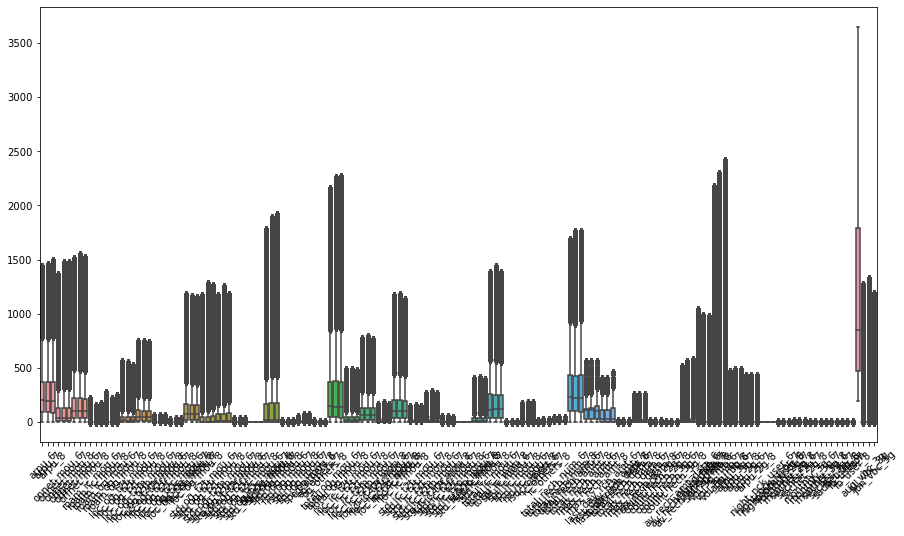

In [47]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X_test_final)

In [ ]:
### Create Pipeline to execute the tasks

scale = StandardScaler()
pca = PCA(n_components=160)
lr = LogisticRegression(max_iter=1000, tol=0.001)